In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import string
import spacy

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
zom = pd.read_csv('reviews.csv')
zom.head()

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review
0,0,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,Been to this place 3-4 times. Prakash is alway...
1,1,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,I recently visited Oliver Brown on a weekend f...
2,2,Crush Coffee,3,"Cafe, Shake, Beverages, Desserts",600,ahmedabad,Very watery ans thin shake
3,3,The Mohalla,3.8,Cafe,550,ahmedabad,it was not cheese burst pizza.. only cheeze wa...
4,4,The Mohalla,3.8,Cafe,550,ahmedabad,"Yammi.,....test burger is best I love 💗 this B..."


In [3]:
zom.shape

(775, 7)

In [5]:
zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           775 non-null    int64 
 1   Name            775 non-null    object
 2   Overall_Rating  775 non-null    object
 3   Cuisine         775 non-null    object
 4   Rate for two    775 non-null    object
 5   City            775 non-null    object
 6   Review          775 non-null    object
dtypes: int64(1), object(6)
memory usage: 42.5+ KB


In [6]:
zom.drop(['Index','Name','Overall_Rating','Cuisine','Rate for two','City'], axis = 1, inplace = True)
zom.head(3)

,Review
0,Been to this place 3-4 times. Prakash is alway...
1,I recently visited Oliver Brown on a weekend f...
2,Very watery ans thin shake


In [8]:
#remove both the leading and the trailing characters

zom = [Review.strip() for Review in zom.Review]
zom = [Review for Review in zom if Review]

In [9]:
zom

['Been to this place 3-4 times. Prakash is always very sweet and accommodating. Plus always ask Vaibhav to make your shakes, they are perfect!!',
 "I recently visited Oliver Brown on a weekend for a cup of iced coffee, and I was thoroughly impressed. The ambience was inviting, the seating comfortable, and the service top-notch. I had the pleasure of trying their iced coffee and dark hot chocolate, both of which were absolutely delicious. It's an excellent place overall, and I'm already looking forward to my next visit",
 'Very watery ans thin shake',
 'it was not cheese burst pizza.. only cheeze was on the top.. not happy with the pizza sent made today',
 'Yammi.,....test burger is best I love 💗 this BergerAnd fry is also missing 😂Love ❤️ you ........',
 'food was not spicy , which I was told to restorant on call and instructions.',
 'Punjabi Thali is great. The taste was good and paratha was the star. The reason simple being provided instead of maida made Naan. So overall mindful serv

In [11]:
# Joining the tweets into one string/text

text = ' '.join(zom)
text

'Been to this place 3-4 times. Prakash is always very sweet and accommodating. Plus always ask Vaibhav to make your shakes, they are perfect!! I recently visited Oliver Brown on a weekend for a cup of iced coffee, and I was thoroughly impressed. The ambience was inviting, the seating comfortable, and the service top-notch. I had the pleasure of trying their iced coffee and dark hot chocolate, both of which were absolutely delicious. It\'s an excellent place overall, and I\'m already looking forward to my next visit Very watery ans thin shake it was not cheese burst pizza.. only cheeze was on the top.. not happy with the pizza sent made today Yammi.,....test burger is best I love 💗 this BergerAnd fry is also missing 😂Love ❤️ you ........ food was not spicy , which I was told to restorant on call and instructions. Punjabi Thali is great. The taste was good and paratha was the star. The reason simple being provided instead of maida made Naan. So overall mindful serving to customer and lik

In [12]:
#Removing all the unwanted commas, symbols from our text

no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'Been to this place 34 times Prakash is always very sweet and accommodating Plus always ask Vaibhav to make your shakes they are perfect I recently visited Oliver Brown on a weekend for a cup of iced coffee and I was thoroughly impressed The ambience was inviting the seating comfortable and the service topnotch I had the pleasure of trying their iced coffee and dark hot chocolate both of which were absolutely delicious Its an excellent place overall and Im already looking forward to my next visit Very watery ans thin shake it was not cheese burst pizza only cheeze was on the top not happy with the pizza sent made today Yammitest burger is best I love 💗 this BergerAnd fry is also missing 😂Love ❤️ you  food was not spicy  which I was told to restorant on call and instructions Punjabi Thali is great The taste was good and paratha was the star The reason simple being provided instead of maida made Naan So overall mindful serving to customer and liked it The owner didnt let us sit in the AC

In [13]:
import nltk #Natural Language Tool Kit, importing nltk library, it is going to have different function that allow us to perform Tokenization, Stemming etc

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
#Tokenization

from nltk.tokenize import word_tokenize #improting tokenization function

text_tokens = word_tokenize(no_punc_text)
print(text_tokens)

['Been', 'to', 'this', 'place', '34', 'times', 'Prakash', 'is', 'always', 'very', 'sweet', 'and', 'accommodating', 'Plus', 'always', 'ask', 'Vaibhav', 'to', 'make', 'your', 'shakes', 'they', 'are', 'perfect', 'I', 'recently', 'visited', 'Oliver', 'Brown', 'on', 'a', 'weekend', 'for', 'a', 'cup', 'of', 'iced', 'coffee', 'and', 'I', 'was', 'thoroughly', 'impressed', 'The', 'ambience', 'was', 'inviting', 'the', 'seating', 'comfortable', 'and', 'the', 'service', 'topnotch', 'I', 'had', 'the', 'pleasure', 'of', 'trying', 'their', 'iced', 'coffee', 'and', 'dark', 'hot', 'chocolate', 'both', 'of', 'which', 'were', 'absolutely', 'delicious', 'Its', 'an', 'excellent', 'place', 'overall', 'and', 'Im', 'already', 'looking', 'forward', 'to', 'my', 'next', 'visit', 'Very', 'watery', 'ans', 'thin', 'shake', 'it', 'was', 'not', 'cheese', 'burst', 'pizza', 'only', 'cheeze', 'was', 'on', 'the', 'top', 'not', 'happy', 'with', 'the', 'pizza', 'sent', 'made', 'today', 'Yammitest', 'burger', 'is', 'best', 

In [15]:
#Top 10 tokens
print((text_tokens[0:10]))

['Been', 'to', 'this', 'place', '34', 'times', 'Prakash', 'is', 'always', 'very']


In [17]:
#Removing Stop-Words

from nltk.corpus import stopwords

nltk.download('stopwords')

my_stop_words = stopwords.words('english') #We want all our Stop-Words present in English language
my_stop_words.append('the')
my_stop_words.append('Its')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words] #Removing Stop-Words
print(no_stop_tokens[0:10])

['Been', 'place', '34', 'times', 'Prakash', 'always', 'sweet', 'accommodating', 'Plus', 'always']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
#Normalize the data - converting every single text into lowercase


lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:15])

['been', 'place', '34', 'times', 'prakash', 'always', 'sweet', 'accommodating', 'plus', 'always', 'ask', 'vaibhav', 'make', 'shakes', 'perfect']


In [19]:
#Stemming

from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:15])

['been', 'place', '34', 'time', 'prakash', 'alway', 'sweet', 'accommod', 'plu', 'alway', 'ask', 'vaibhav', 'make', 'shake', 'perfect']


In [20]:
# NLP english language model of spacy library

nlp = spacy.load('en_core_web_sm')

In [21]:
#combining every review together

doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Been place 34 times Prakash always sweet accommodating Plus always ask Vaibhav make shakes perfect I recently visited Oliver Brown weekend cup iced coffee I thoroughly impressed The ambience inviting seating comfortable service topnotch I pleasure trying iced coffee dark


In [22]:
#Creating Tokens using Lemma function

lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['be', 'place', '34', 'time', 'Prakash', 'always', 'sweet', 'accommodate', 'plus', 'always', 'ask', 'Vaibhav', 'make', 'shake', 'perfect', 'I', 'recently', 'visit', 'Oliver', 'Brown', 'weekend', 'cup', 'ice', 'coffee', 'I']


In [23]:
#Feature Extraction

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

x = vectorizer.fit_transform(lemmas)

In [26]:
#Converting entire vectorizer.vocabulary into DataFrame

pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(),index=[0]).T

,0
be,300
place,2004
34,33
time,2675
prakash,2052
...,...
reject,2176
thupka,2665
dilver,806
mohali,1703


In [27]:
#Sorting it from biggest to smallest value

pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head()

,0
ànd,2978
zomato,2977
zolocrust,2976
yup,2975
yummyso,2974


In [28]:
print(vectorizer.vocabulary_)

{'be': 300, 'place': 2004, '34': 33, 'time': 2675, 'prakash': 2052, 'always': 142, 'sweet': 2563, 'accommodate': 79, 'plus': 2025, 'ask': 222, 'vaibhav': 2795, 'make': 1598, 'shake': 2349, 'perfect': 1973, 'recently': 2155, 'visit': 2835, 'oliver': 1851, 'brown': 410, 'weekend': 2883, 'cup': 728, 'ice': 1311, 'coffee': 589, 'thoroughly': 2655, 'impress': 1325, 'the': 2632, 'ambience': 155, 'invite': 1380, 'seat': 2310, 'comfortable': 609, 'service': 2340, 'topnotch': 2703, 'pleasure': 2023, 'try': 2734, 'dark': 747, 'hot': 1284, 'chocolate': 540, 'absolutely': 73, 'delicious': 772, 'excellent': 946, 'overall': 1891, 'already': 135, 'look': 1560, 'forward': 1063, 'next': 1782, 'very': 2814, 'watery': 2873, 'ans': 177, 'thin': 2646, 'cheese': 517, 'burst': 432, 'pizza': 2001, 'cheeze': 521, 'top': 2702, 'happy': 1222, 'send': 2327, 'today': 2687, 'yammitest': 2953, 'burger': 428, 'well': 2888, 'love': 1569, 'bergerand': 321, 'fry': 1104, 'also': 137, 'miss': 1688, 'food': 1044, 'spicy': 

In [29]:
#Converting it into an Array

print(vectorizer.get_feature_names_out()[50:100])
print(x.toarray()[50:100])

['55' '55hygiene455cleanliness55staff' '5star' '600' '700' '710' '762peri'
 '825' '88' '8inches' 'a1' 'aa' 'aaayyhayyyhayyhayyy' 'aaj' 'aap'
 'aarambh' 'aata' 'aavin' 'aayegiprice' 'ab' 'ability' 'able' 'absolute'
 'absolutely' 'aby' 'ac' 'acai' 'accept' 'accidentally' 'accommodate'
 'accommodative' 'accord' 'ache' 'acidic' 'acknowledge' 'acquire' 'across'
 'act' 'action' 'activity' 'actual' 'actually' 'add' 'addiction'
 'addition' 'adjust' 'adoniya' 'adorn' 'adventure' 'ae']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
print(x.toarray().shape)

(13596, 2979)


In [32]:
#Bi-Grams & Tri-Grams

vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(3,3),max_features = 100)

bow_matrix_ngram =vectorizer_ngram_range.fit_transform(zom)

In [33]:
bow_matrix_ngram

<775x100 sparse matrix of type '<class 'numpy.int64'>'
	with 557 stored elements in Compressed Sparse Row format>

In [34]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['and food was' 'and it was' 'and the ambience' 'and the food'
 'and the service' 'and the staff' 'and the taste' 'as compared to'
 'as well as' 'but it was' 'co working space' 'few days back'
 'food is also' 'food is good' 'food is very' 'food quality was'
 'food was good' 'friends and family' 'from this place' 'good place to'
 'hangout with friends' 'if you are' 'if you re' 'if you want'
 'is also very' 'is good and' 'is not good' 'is really good' 'is the best'
 'is very good' 'it perfect place' 'it was really' 'it was too'
 'just loved the' 'keep it up' 'know how to' 'must try there'
 'must visit place' 'nice place to' 'not at all' 'not worth the'
 'of food and' 'of food is' 'of the best' 'of the food' 'of the place'
 'on the menu' 'one of the' 'perfect place for' 'peri peri fries'
 'place to chill' 'place to hangout' 'place to visit' 'portion size was'
 'quality of food' 'really good and' 'recently visited this' 'sad to see'
 'spilled in the' 'taste of the' 'taste was good' 'the am

In [35]:
#TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer #importing the library


vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(2,3), max_features = 10)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(zom) #fitting it into original first dataset tweets

print(tf_idf_matrix_n_gram_max_features.toarray())

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
#Import packages

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");

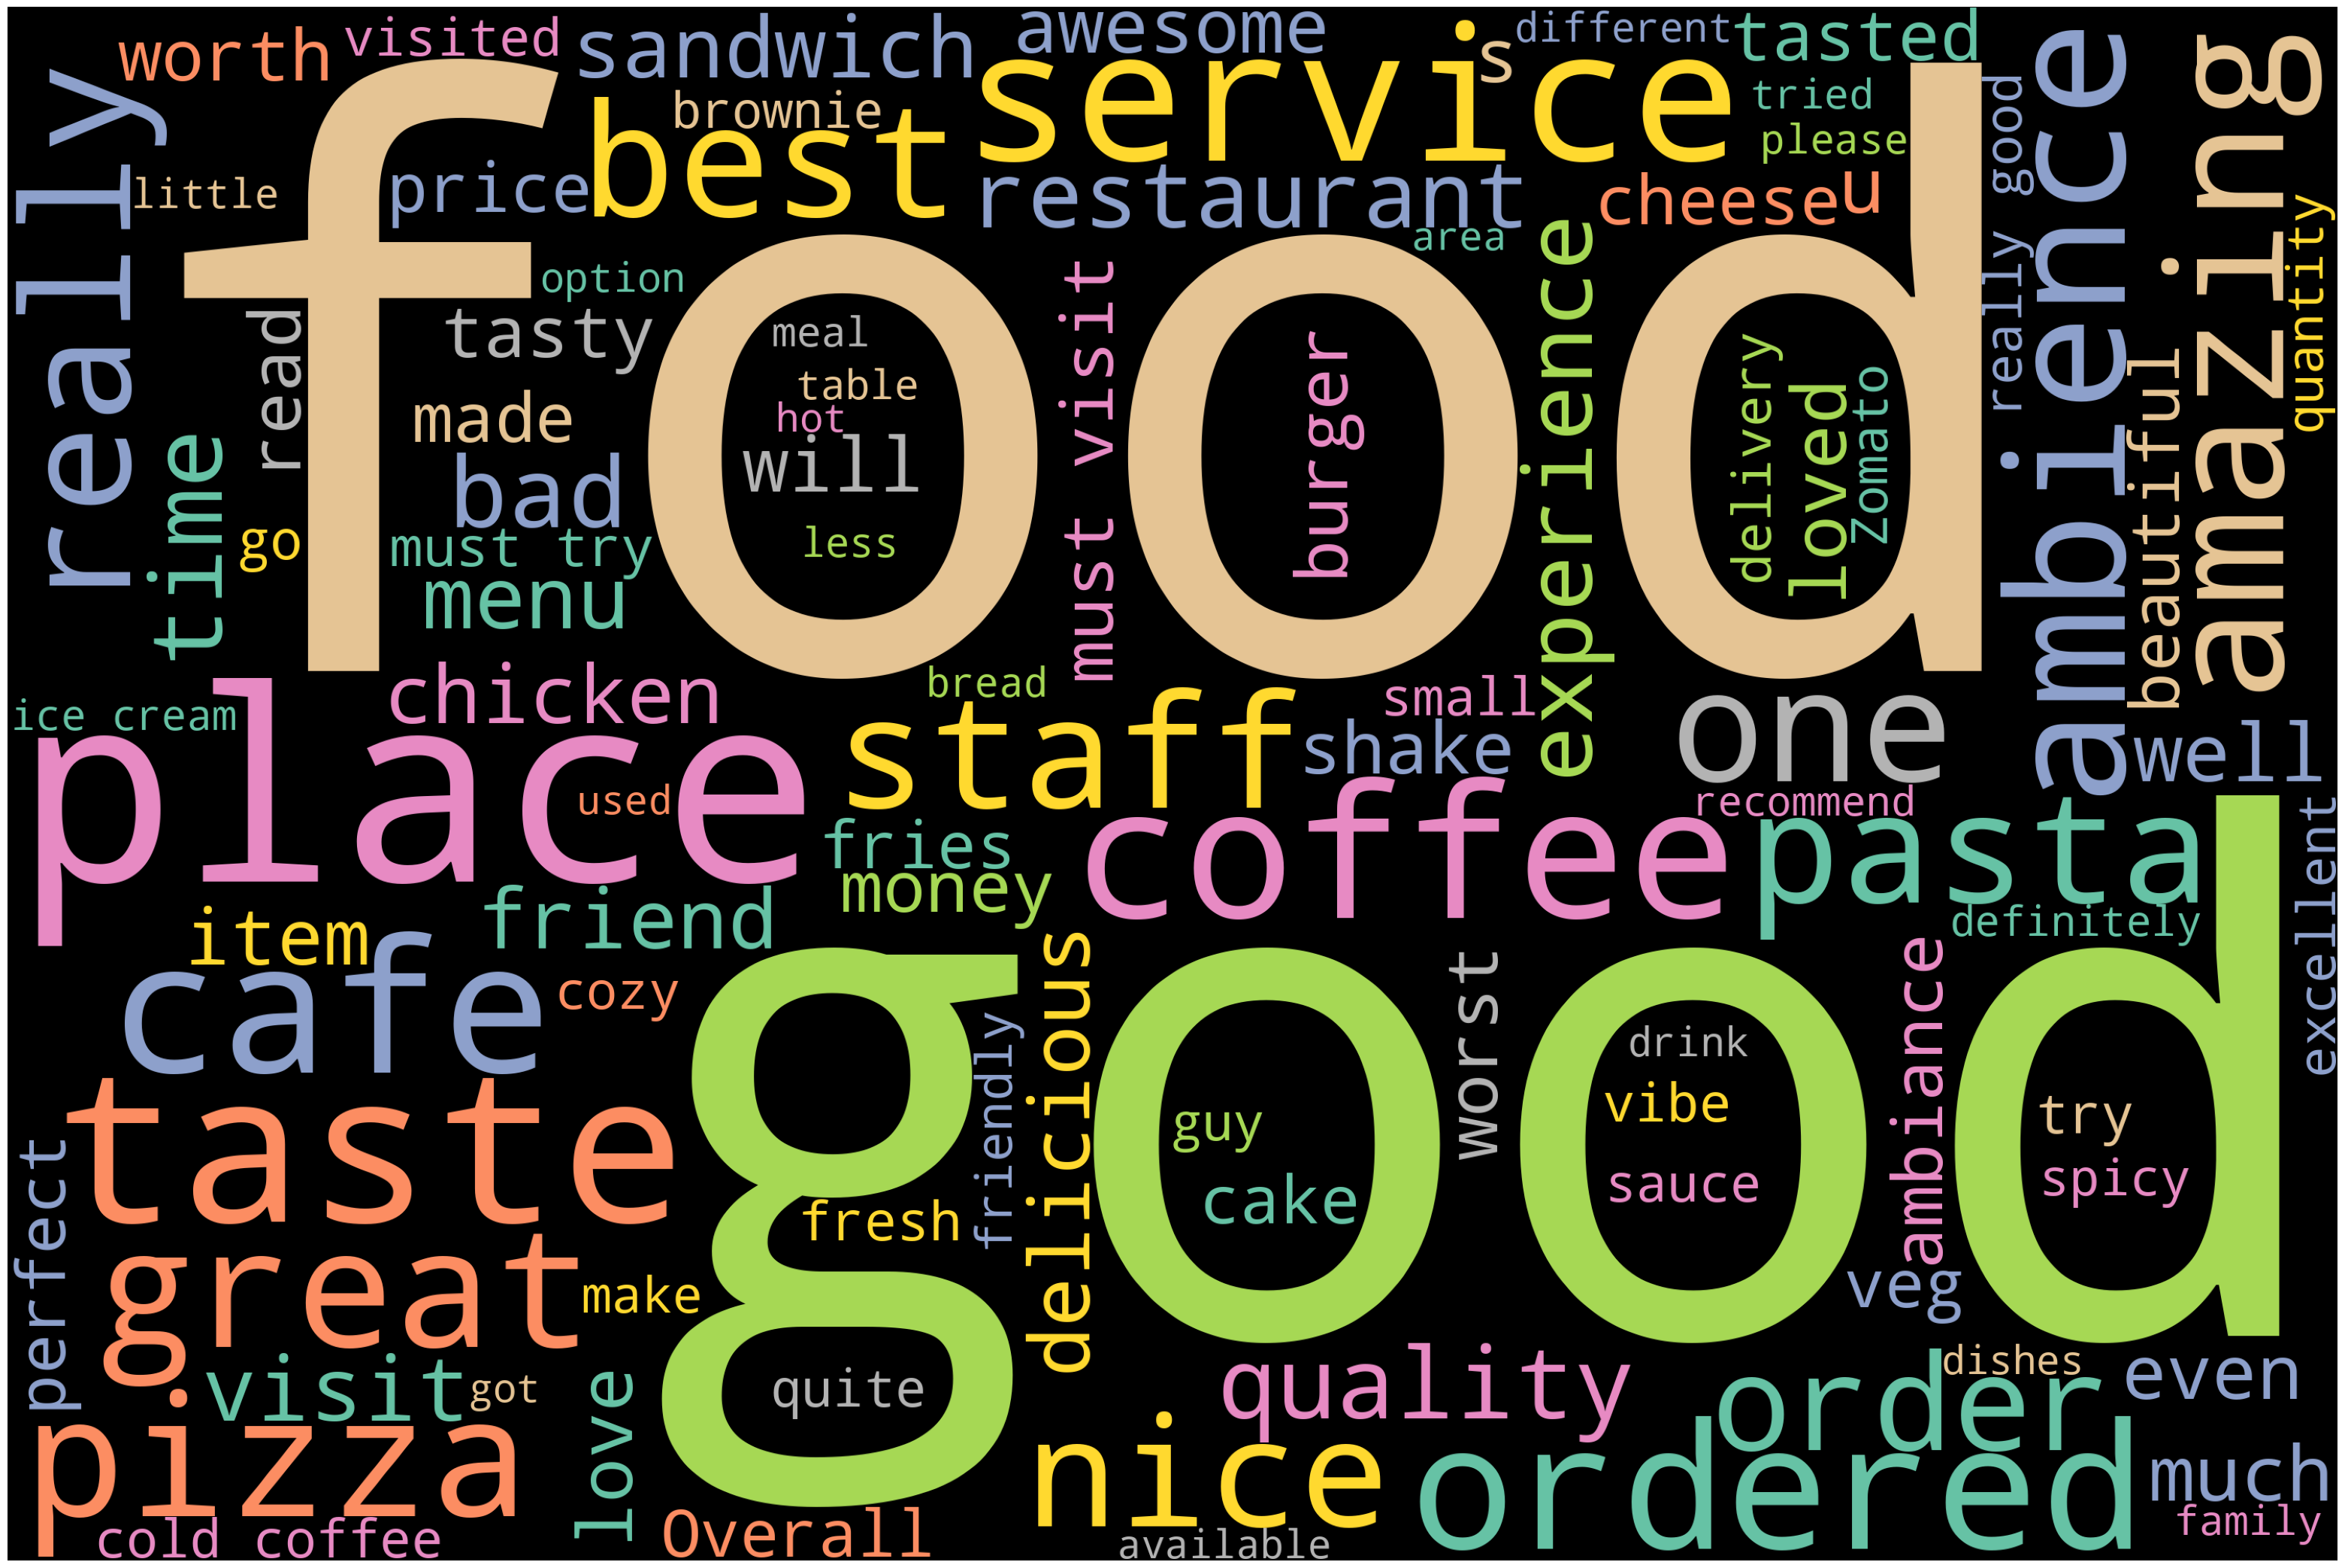

In [37]:
#Generate wordcloud

stopwords = STOPWORDS

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)

plot_cloud(wordcloud)
#Biggest word is the most occuring one

In [39]:
#Emotion Mining

#Sentiment analysis

afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [47]:
#Reading the dataset again

zom = pd.read_csv('reviews.csv')
zom.head()

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review
0,0,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,Been to this place 3-4 times. Prakash is alway...
1,1,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,I recently visited Oliver Brown on a weekend f...
2,2,Crush Coffee,3,"Cafe, Shake, Beverages, Desserts",600,ahmedabad,Very watery ans thin shake
3,3,The Mohalla,3.8,Cafe,550,ahmedabad,it was not cheese burst pizza.. only cheeze wa...
4,4,The Mohalla,3.8,Cafe,550,ahmedabad,"Yammi.,....test burger is best I love 💗 this B..."


In [48]:
zom.drop(['Index','Name','Overall_Rating','Cuisine','Rate for two','City'], axis = 1, inplace = True)

In [49]:
zom.head(3)

,Review
0,Been to this place 3-4 times. Prakash is alway...
1,I recently visited Oliver Brown on a weekend f...
2,Very watery ans thin shake


In [50]:
#remove both the leading and the trailing characters

zom = [Review.strip() for Review in zom.Review]
zom = [Review for Review in zom if Review]

In [51]:
zom

['Been to this place 3-4 times. Prakash is always very sweet and accommodating. Plus always ask Vaibhav to make your shakes, they are perfect!!',
 "I recently visited Oliver Brown on a weekend for a cup of iced coffee, and I was thoroughly impressed. The ambience was inviting, the seating comfortable, and the service top-notch. I had the pleasure of trying their iced coffee and dark hot chocolate, both of which were absolutely delicious. It's an excellent place overall, and I'm already looking forward to my next visit",
 'Very watery ans thin shake',
 'it was not cheese burst pizza.. only cheeze was on the top.. not happy with the pizza sent made today',
 'Yammi.,....test burger is best I love 💗 this BergerAnd fry is also missing 😂Love ❤️ you ........',
 'food was not spicy , which I was told to restorant on call and instructions.',
 'Punjabi Thali is great. The taste was good and paratha was the star. The reason simple being provided instead of maida made Naan. So overall mindful serv

In [52]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(zom))
sentences[5:15]

['I had the pleasure of trying their iced coffee and dark hot chocolate, both of which were absolutely delicious.',
 "It's an excellent place overall, and I'm already looking forward to my next visit Very watery ans thin shake it was not cheese burst pizza.. only cheeze was on the top.. not happy with the pizza sent made today Yammi.,....test burger is best I love 💗 this BergerAnd fry is also missing 😂Love ❤️ you ........ food was not spicy , which I was told to restorant on call and instructions.",
 'Punjabi Thali is great.',
 'The taste was good and paratha was the star.',
 'The reason simple being provided instead of maida made Naan.',
 "So overall mindful serving to customer and liked it The owner didn't let us sit in the AC though it was not at all reserved.",
 "We already had booked our table priorly then also he didn't give us the AC table to sit.",
 'He said that you should call us and book the AC table but no one ever picks the call at all.',
 'Both coffees were spilled and th

In [53]:
#Converting above sentences into dataframe

sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Been to this place 3-4 times.
1,Prakash is always very sweet and accommodating.
2,"Plus always ask Vaibhav to make your shakes, t..."
3,I recently visited Oliver Brown on a weekend f...
4,"The ambience was inviting, the seating comfort..."
...,...
1322,would recommend it to others pathetic food rej...
1323,very fast dilver Tried their Hummus and Pita b...
1324,Didn't expected this good Hummus in Mohali.
1325,Will try more in their menu in future.


In [54]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [55]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text) #
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score #for word in sentence: calculate the overall sentence score, it will calculate the overall sentiment score of sentence and will ive it the sent_score variable

In [56]:
sent_df

,sentence
0,Been to this place 3-4 times.
1,Prakash is always very sweet and accommodating.
2,"Plus always ask Vaibhav to make your shakes, t..."
3,I recently visited Oliver Brown on a weekend f...
4,"The ambience was inviting, the seating comfort..."
...,...
1322,would recommend it to others pathetic food rej...
1323,very fast dilver Tried their Hummus and Pita b...
1324,Didn't expected this good Hummus in Mohali.
1325,Will try more in their menu in future.


In [57]:
#Adding all the sentiment total or overall scores of per sentences or reviews into DataFrame sent_df

sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

Been to this place 3-4 times.
Prakash is always very sweet and accommodating.
Plus always ask Vaibhav to make your shakes, they are perfect!!
I recently visited Oliver Brown on a weekend for a cup of iced coffee, and I was thoroughly impressed.
The ambience was inviting, the seating comfortable, and the service top-notch.
I had the pleasure of trying their iced coffee and dark hot chocolate, both of which were absolutely delicious.
It's an excellent place overall, and I'm already looking forward to my next visit Very watery ans thin shake it was not cheese burst pizza.. only cheeze was on the top.. not happy with the pizza sent made today Yammi.,....test burger is best I love 💗 this BergerAnd fry is also missing 😂Love ❤️ you ........ food was not spicy , which I was told to restorant on call and instructions.
Punjabi Thali is great.
The taste was good and paratha was the star.
The reason simple being provided instead of maida made Naan.
So overall mindful serving to customer and liked 

In [58]:
sent_df

,sentence,sentiment_value
0,Been to this place 3-4 times.,0
1,Prakash is always very sweet and accommodating.,2
2,"Plus always ask Vaibhav to make your shakes, t...",3
3,I recently visited Oliver Brown on a weekend f...,3
4,"The ambience was inviting, the seating comfort...",5
...,...,...
1322,would recommend it to others pathetic food rej...,-1
1323,very fast dilver Tried their Hummus and Pita b...,0
1324,Didn't expected this good Hummus in Mohali.,3
1325,Will try more in their menu in future.,0


In [59]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value
897,"amazing place😍, I totally loved this place💕,al...",22
662,Mocktails : Honestly I didn't like the mocktai...,22
122,testy food new amazing food test good Best foo...,22
655,The last seating area is the personal seating ...,23
729,"worst ice cream i had ever had, i think the br...",24
88,"Amazing items on the menu, best for nightlife ...",26
416,I tried -bagel cream cheese 4/5-edamame fava b...,26
989,"Amazing decor, amazing ambience.Highly recomme...",26
513,I mean this place has definitely got that cute...,30
940,"Cafe is so cute and cozy, they have bean bags ...",39


In [61]:
#Sentiment score of the tweets

sent_df['sentiment_value'].describe()

count    1327.000000
mean        2.116051
std         4.172752
min       -11.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        39.000000
Name: sentiment_value, dtype: float64

In [62]:
sent_df['sentiment_value'].mean()

2.1160512434061793

In [63]:
# Sentiment score of the whole review

sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value
0,Been to this place 3-4 times.,0
9,The reason simple being provided instead of ma...,0
11,We already had booked our table priorly then a...,0
12,He said that you should call us and book the A...,-1
13,Both coffees were spilled and the box of pasta...,-1


In [64]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

#this is the highest negative sentiment or emotion present

'very bad taste I hate it...it was not baked properly there were two thick strands of hair in my sandwich too late Worst service, the staff doesn’t hear your order well and then don’t even have the courtesy to talk to their customer well and get their order replaced.👎🏻 Very bad salad.'

In [65]:
sent_df['index'] = range(0,len(sent_df))
sent_df

,sentence,sentiment_value,index
0,Been to this place 3-4 times.,0,0
1,Prakash is always very sweet and accommodating.,2,1
2,"Plus always ask Vaibhav to make your shakes, t...",3,2
3,I recently visited Oliver Brown on a weekend f...,3,3
4,"The ambience was inviting, the seating comfort...",5,4
...,...,...,...
1322,would recommend it to others pathetic food rej...,-1,1322
1323,very fast dilver Tried their Hummus and Pita b...,0,1323
1324,Didn't expected this good Hummus in Mohali.,3,1324
1325,Will try more in their menu in future.,0,1325


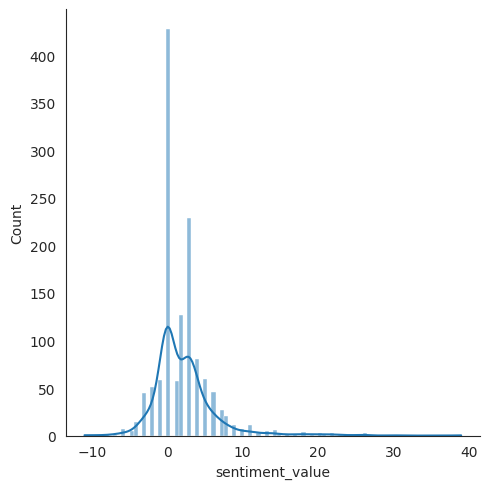

In [66]:
#Plotting using distribution to see the overall sentiment or emotion by visualization

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()


#the overall sentiment value is the mean/average is lying somewhere around 0

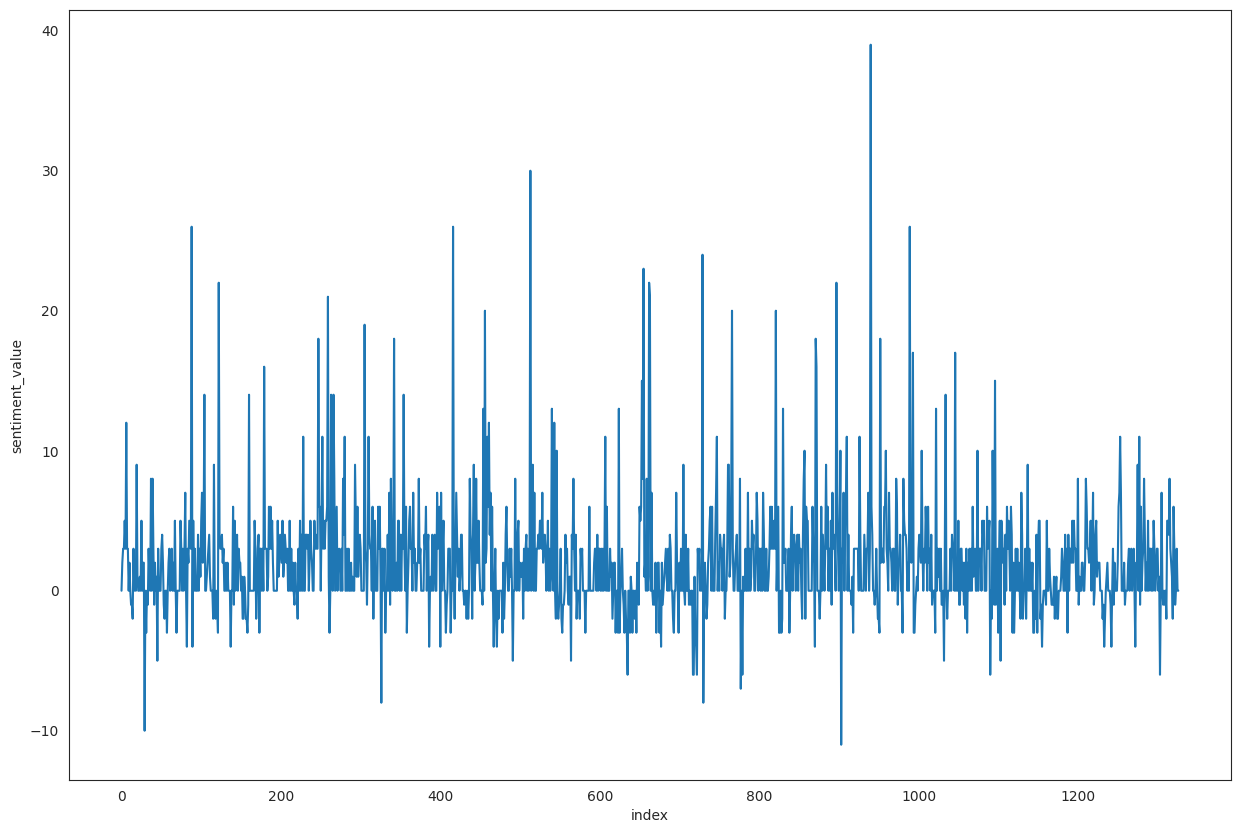

In [67]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)
plt.show()

#By observing the plot we can say it is fluctuating around the mean value, so the overall sentiment or emotion we can say is Neutral and some positive

In [68]:
#Word Count

sent_df['Word_Count'] = sent_df['sentence'].apply(lambda x: len(str(x).split(' ')))
sent_df.head(10)

,sentence,sentiment_value,index,Word_Count
0,Been to this place 3-4 times.,0,0,6
1,Prakash is always very sweet and accommodating.,2,1,7
2,"Plus always ask Vaibhav to make your shakes, t...",3,2,11
3,I recently visited Oliver Brown on a weekend f...,3,3,19
4,"The ambience was inviting, the seating comfort...",5,4,11
5,I had the pleasure of trying their iced coffee...,3,5,19
6,"It's an excellent place overall, and I'm alrea...",12,6,71
7,Punjabi Thali is great.,3,7,4
8,The taste was good and paratha was the star.,3,8,9
9,The reason simple being provided instead of ma...,0,9,10


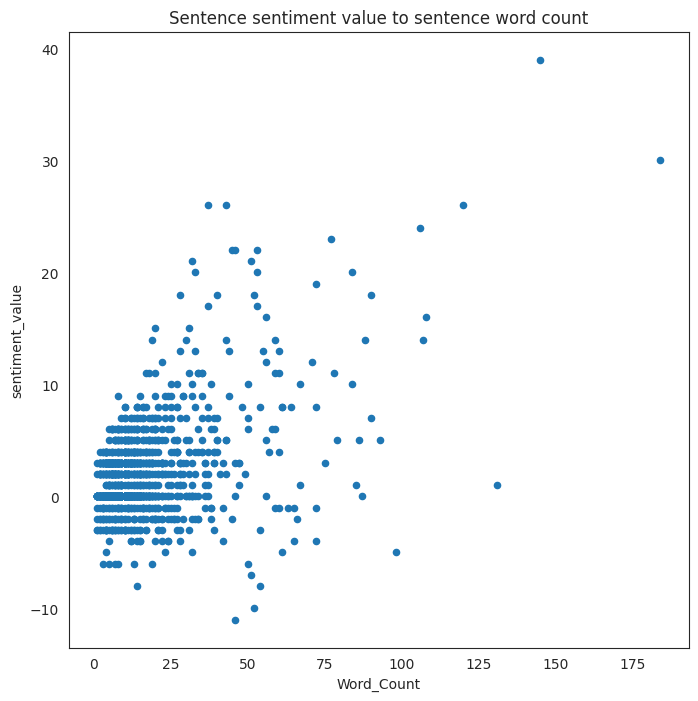

In [69]:
sent_df.plot.scatter(x='Word_Count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')
plt.show()